In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('/content/Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.isnull().sum() # no missing values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:
numeric_cols=df.select_dtypes(include=['int64']).columns

In [75]:
numeric_cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [76]:
category_col=df.select_dtypes(include=['object']).columns

In [78]:
category_col

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [101]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)

In [191]:
ct=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False), category_col),
    ('std_scaled',StandardScaler(),numeric_cols)
])

In [192]:
x_train_transformed=ct.fit_transform(x_train)

In [193]:
x_train_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  1.53917323,
         2.58764353,  0.36795665],
       [ 1.        ,  0.        ,  1.        , ...,  1.53917323,
        -0.91249891,  2.70998729],
       [ 1.        ,  0.        ,  1.        , ..., -0.5579503 ,
        -0.91249891,  1.53897197],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.53917323,
         1.42092939,  0.36795665],
       [ 1.        ,  0.        ,  0.        , ..., -0.5579503 ,
        -0.91249891, -0.80305867],
       [ 1.        ,  1.        ,  0.        , ...,  1.53917323,
         2.58764353,  0.36795665]])

In [85]:
x_test_transformed=ct.transform(x_test)

In [88]:
x_train_transformed.shape  #furnishedstatus has 3 categories hence after transforming we got one column more

(436, 13)

In [89]:
x_train.shape

(436, 12)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
LR=LinearRegression()

In [105]:
LR.fit(x_train_transformed,y_train)

LinearRegression()

In [106]:
LR.coef_

array([ 367919.94767957,  231610.03717565,  390251.17618109,
        684649.88533879,  791426.73584319,  629890.56531336,
       -126881.81758511, -413645.06222822,  519552.41633999,
         57349.55941862,  521879.02774805,  349251.43890557,
        192005.95366749])

In [109]:
LR.intercept_

np.float64(3969403.5565888816)

In [111]:
y_pred=LR.predict(x_test_transformed)

In [152]:
y_train

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000
...,...
71,6755000
106,6160000
270,4340000
435,3290000


In [157]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [158]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
r2_val=r2_score(y_test,y_pred)

In [159]:
print(MSE)
print(MAE)
print(r2_val)

1754318687330.6682
970043.4039201643
0.6529242642153175


In [160]:
from sklearn.model_selection import cross_val_score
cross_val_score(LR,x_train_transformed,y_train,cv=5,scoring='r2').mean()
#same results

np.float64(0.6470401792343204)

we can try some regularization

In [161]:
from sklearn.linear_model import Ridge,Lasso

In [162]:
rd=Ridge(alpha=0.1)
rd2=rd.fit(x_train_transformed,y_train)
y_pred2=rd2.predict(x_test_transformed)

In [164]:
MSE2=mean_squared_error(y_test,y_pred2)
MAE2=mean_absolute_error(y_test,y_pred2)
r2_val2=r2_score(y_test,y_pred2)
print(MSE2)
print(MAE2)
print(r2_val2)  #same results


1754745964178.538
970182.0060927168
0.6528397314406118


In [165]:
from sklearn.model_selection import GridSearchCV

In [170]:
param_grid= {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
     'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

In [171]:
gd=GridSearchCV(rd,param_grid,cv=5,scoring='r2')

In [172]:
gd.fit(x_train_transformed,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg']},
             scoring='r2')

In [174]:
gd.best_params_

{'alpha': 10, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [175]:
gd.best_score_

np.float64(0.6484539498449251)

we can see that even after finding best parameters,its best score is 0.64

Plot

In [201]:
x_plot=pd.DataFrame(x_train_transformed,columns=ct.get_feature_names_out())
x_test_plot=pd.DataFrame(x_test_transformed,columns=ct.get_feature_names_out())

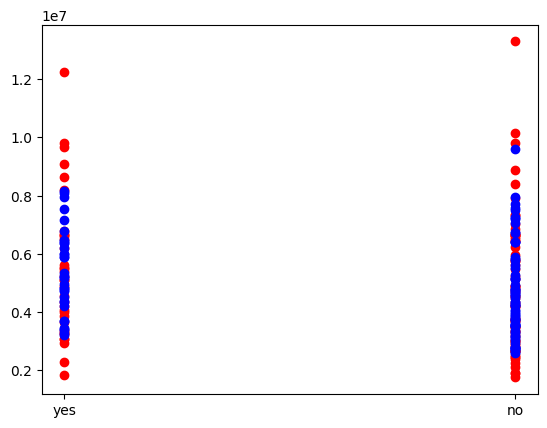

In [209]:
plt.scatter(x_test['basement'],y_test,color='red')
plt.scatter(x_test['basement'],y_pred,color='blue')
plt.show()